# Visualising the Classification Power of Data (Python Tutorial)
Using PCA to explore how well your data can separate classes
<br>
Dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
#imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Dataset

In [2]:
data = pd.read_csv("../data/diabetes.csv")
print(data.columns)
data.head()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
#Infomation values
import information_value as iv

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for f in features:
    iv_ = iv.calc_iv(data,f,'Outcome')
    print("{}: {}".format(f,round(iv_,2)))

Pregnancies: 0.34
Glucose: 0.67
BloodPressure: 0.26
SkinThickness: 0.3
Insulin: 0.14
BMI: 0.44
DiabetesPedigreeFunction: 0.15
Age: 0.85


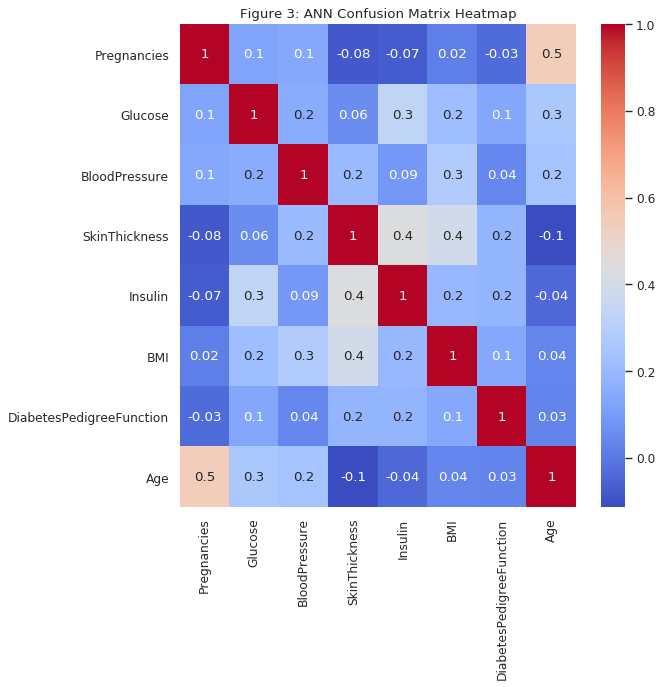

In [43]:
#Correlation Matrix
mat = data[features].corr()
test_data = pd.DataFrame(mat,columns=features,index=features)

plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
sns.set(font_scale=1)
ax = plt.axes()
sns.heatmap(mat,cmap='coolwarm',ax=ax,annot=True,fmt='.0g')
ax.set_title('Figure 3: ANN Confusion Matrix Heatmap')
plt.show()

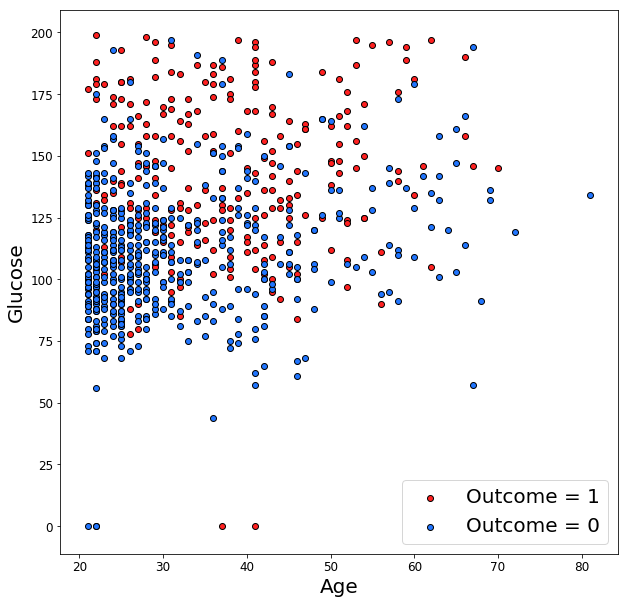

In [3]:
plt.subplots(nrows=1, ncols=1,figsize=(10,10))

plt.scatter('Age','Glucose',c='#ff2121',edgecolors='#000000',data=data[data.Outcome == 1])
plt.scatter('Age','Glucose',c='#2176ff',edgecolors='#000000',data=data[data.Outcome == 0])
plt.ylabel("Glucose",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.legend(['Outcome = 1','Outcome = 0'],loc =4,prop={"size":20})

plt.savefig('../figures/pca1.png',format='png')

In [ ]:
### PCA - Entire Dataset

In [6]:
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)

In [7]:
pca = PCA(n_components=2)
pca.fit(scaled)

pc = pca.transform(scaled)
pc1 = pc[:,0]
pc2 = pc[:,1]

Text(0, 0.5, 'PC2')

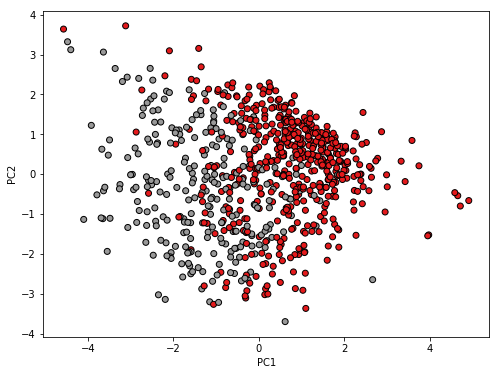

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(pc1,pc2,c=data['Outcome'],cmap='Set1',edgecolors='black')

plt.subplots(nrows=1, ncols=1,figsize=(10,10))

plt.scatter('Age','Glucose',c='#ff2121',edgecolors='#000000',data=data[data.Outcome == 1])
plt.scatter('Age','Glucose',c='#2176ff',edgecolors='#000000',data=data[data.Outcome == 0])
plt.ylabel("Glucose",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.legend(['Outcome = 1','Outcome = 0'],loc =4,prop={"size":20})

plt.savefig('../figures/pca1.png',format='png')



plt.xlabel('PC1')
plt.ylabel('PC2')